In [1]:
%conda install numpy scipy

Solving environment...
Solving took 1.168300000000745 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
~ comm                          0.2.2 -> 0.2.3                pyhd8ed1ab_1 -> pyhe01879c_0  https://repo.prefix.dev/conda-forge -> https://repo.prefix.dev/conda-forge/
~ contourpy                     1.3.2 -> 1.3.3                py313h3a67976_0 -> py313h3a67976_1https://repo.prefix.dev/emscripten-forge-dev -> https://repo.prefix.dev/emscripten-forge-dev/
~ emscripten-abi                3.1.73 -> 3.1.73              h267e887_10 -> h267e887_12    https://repo.prefix.dev/emscripten-forge-dev -> https://repo.prefix.dev/emscripten-forge-dev/
~ fonttools                     4.39.4 -> 4.39.4              h7223423_0 -> py313h6e18b15_1 https://repo.prefix.dev/emscripten-forge-dev -> https://re

## 1. 


### (a) 

The potential for significant round-off error happens when the term $4ac$ is very small compared to $b^2$. In this situation, the expression inside the square root, $\sqrt{b^2 - 4ac}$, is very close in value to $|b|$.

If we assume $b$ is a large positive number, one of the roots is calculated as:
$$x_1 = \frac{-b + \sqrt{b^2 - 4ac}}{2a}$$

The numerator now involves subtracting two large numbers that are nearly identical. This operation is numerically unstable and leads to a phenomenon called catastrophic cancellation, where the most significant digits cancel each other out, leaving a result with very low precision.

---

### (b) 

To avoid this issue, we can derive a more stable formula for the problematic root ($x_1$) by multiplying the numerator and denominator by the conjugate, $-b - \sqrt{b^2 - 4ac}$:

$$x_1 = \frac{-b + \sqrt{b^2 - 4ac}}{2a} \times \frac{-b - \sqrt{b^2 - 4ac}}{-b - \sqrt{b^2 - 4ac}}$$

This simplifies to the final, more stable expression:

$$x_1 = \frac{2c}{-b - \sqrt{b^2 - 4ac}}$$

This formula avoids the subtraction of nearly equal numbers and will produce a much more accurate result.

## 2. 


The code first implements the series calculation. It then compares the series approximation to the result from numpy.exp for both a large positive value ($x=20$) and a large negative value ($x=-20$). The resulting error plot shows that while the series converges for $x=20$, it fails catastrophically for $x=-20$ due to round-off errors from summing large, alternating terms.

Finally, a more accurate method is implemented for negative exponents using the identity $e^{-x} = 1/e^x$. A second plot demonstrates that this improved method is stable and accurate.

Matplotlib is building the font cache; this may take a moment.


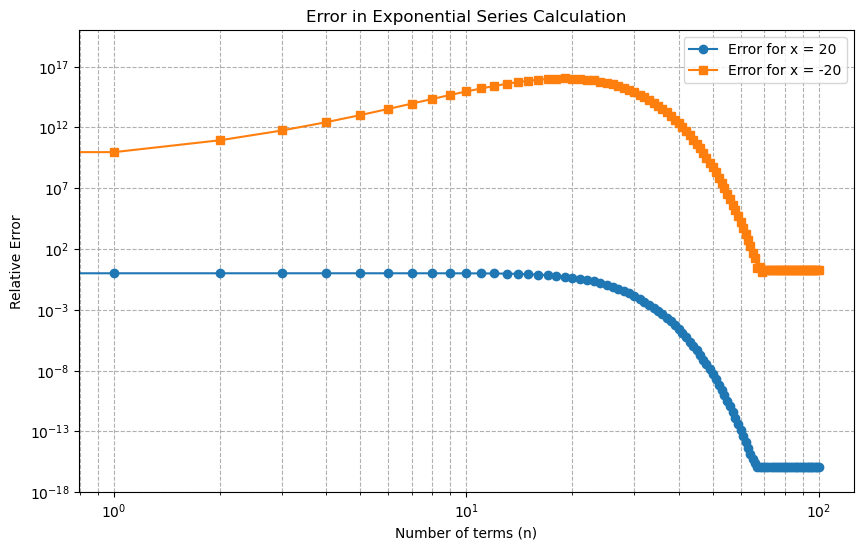

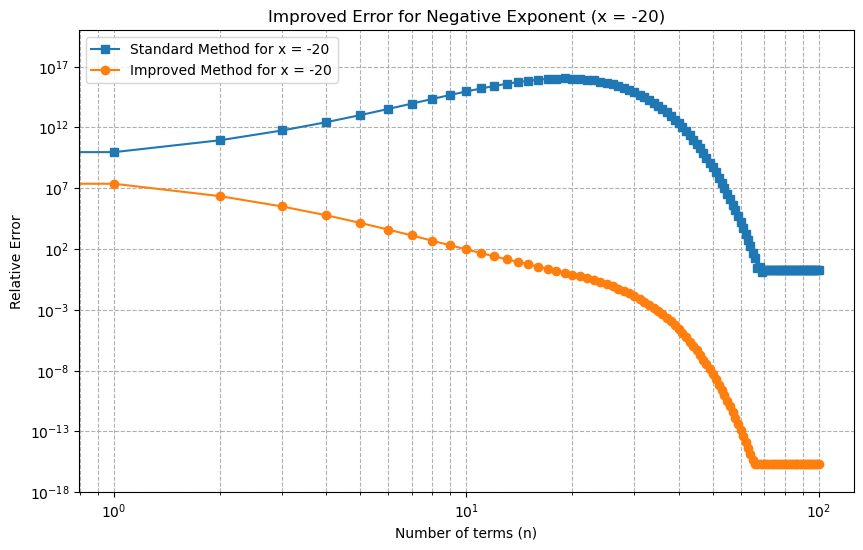

In [2]:
# Problem 2 Code
import numpy as np
import matplotlib.pyplot as plt

# (a)
# Function to compute the exponential series S_n(x)
def exp_series(x, n):
    s = 1.0  # Initialize sum with the first term (k=0)
    term = 1.0 # Initialize the term for k=0
    # Loop from k=1 to n to calculate all terms
    for k in range(1, n + 1):
        # Calculate the next term iteratively to avoid large numbers
        term = term * x / k
        s += term
    return s

# A more accurate function that uses the identity e^-x = 1/e^x
def accurate_exp(x, n):
    if x < 0:
        # For negative x, calculate the series for -x and take the reciprocal
        return 1.0 / exp_series(-x, n)
    else:
        # For positive x, the standard series is fine
        return exp_series(x, n)




# (b)
x_pos, x_neg = 20, -20
n_vals = np.arange(0, 101) # Number of terms to test
true_pos = np.exp(x_pos)   # "True" value from numpy
true_neg = np.exp(x_neg)

# Calculate the error for the standard series method
series_neg = np.array([exp_series(x_neg, n) for n in n_vals])
error_neg = np.abs(true_neg - series_neg) / true_neg

# Generate the plot
plt.figure(figsize=(10, 6))
plt.loglog(n_vals, np.abs(true_pos - np.array([exp_series(x_pos, n) for n in n_vals])) / true_pos, 'o-', label=f'Error for x = {x_pos}')
plt.loglog(n_vals, error_neg, 's-', label=f'Error for x = {x_neg}')
plt.xlabel("Number of terms (n)")
plt.ylabel("Relative Error")
plt.title("Error in Exponential Series Calculation")
plt.legend()
plt.ylim(1e-18, 1e20)
plt.grid(True, which="both", ls="--")
plt.show()




# (c)
# Calculate the error for the improved method for x=-20
series_neg_improved = np.array([accurate_exp(x_neg, n) for n in n_vals])
error_neg_improved = np.abs(true_neg - series_neg_improved) / true_neg

# Generate the comparison plot
plt.figure(figsize=(10, 6))
plt.loglog(n_vals, error_neg, 's-', label='Standard Method for x = -20')
plt.loglog(n_vals, error_neg_improved, 'o-', label='Improved Method for x = -20')
plt.xlabel("Number of terms (n)")
plt.ylabel("Relative Error")
plt.title("Improved Error for Negative Exponent (x = -20)")
plt.legend()
plt.ylim(1e-18, 1e20)
plt.grid(True, which="both", ls="--")
plt.show()

## 3. 


The code implements first order forward difference, second order central difference, and fourth order central difference

It then calculates the absolute error for each method compared to the analytical solution over a wide range of step sizes ($\Delta x$). The final log-log plot of the error vs. step size illustrates the trade-off between truncation error (dominant at large $\Delta x$) and round-off error (dominant at small $\Delta x$) for each method.

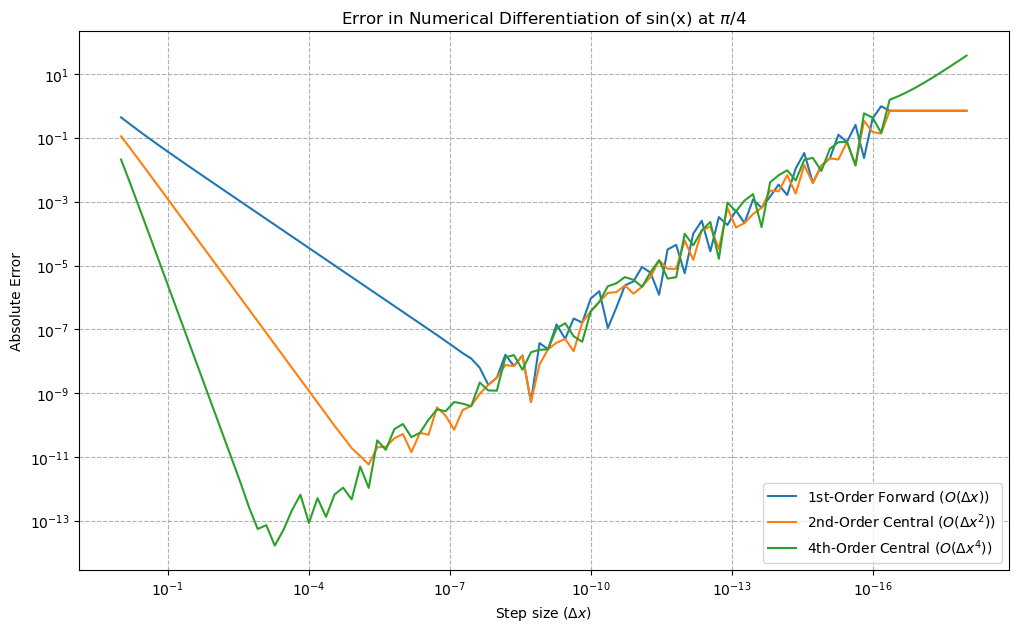

In [3]:
# Problem 3 Code
import numpy as np
import matplotlib.pyplot as plt

# Define the point and the function
x0 = np.pi / 4
f = np.sin
# Calculate the true analytical derivative for comparison
true_derivative = np.cos(x0)

# Create a range of step sizes, from large to very small
dx_vals = np.logspace(-18, 0, 100)

# Calculate the derivative and error for each method 

# 1. First order forward difference formula
deriv_forward = (f(x0 + dx_vals) - f(x0)) / dx_vals
error_forward = np.abs(deriv_forward - true_derivative)

# 2. Second order central difference formula
deriv_central2 = (f(x0 + dx_vals) - f(x0 - dx_vals)) / (2 * dx_vals)
error_central2 = np.abs(deriv_central2 - true_derivative)

# 3. Fourth order central difference formula
deriv_central4 = (-f(x0 + 2*dx_vals) + 8*f(x0 + dx_vals) - 8*f(x0 - dx_vals) + f(x0 - 2*dx_vals)) / (12 * dx_vals)
error_central4 = np.abs(deriv_central4 - true_derivative)

# Plot the results
plt.figure(figsize=(12, 7))
plt.loglog(dx_vals, error_forward, label='1st-Order Forward ($O(\\Delta x)$)')
plt.loglog(dx_vals, error_central2, label='2nd-Order Central ($O(\\Delta x^2)$)')
plt.loglog(dx_vals, error_central4, label='4th-Order Central ($O(\\Delta x^4)$)')
plt.xlabel("Step size ($\\Delta x$)")
plt.ylabel("Absolute Error")
plt.title("Error in Numerical Differentiation of sin(x) at $\\pi/4$")
plt.legend()
# Invert x-axis to show dx decreasing from left to right
plt.gca().invert_xaxis()
plt.grid(True, which="both", ls="--")
plt.show()

## 4. 


The code first plots the integrand to visualize its oscillatory behavior. It then calculates the integral to a target accuracy of $10^{-6}$ using:

-An adaptive trapezoid rule that iteratively doubles the number of intervals.

-Romberg integration, which uses Richardson extrapolation to improve the trapezoid rule results.

-Gauss-Legendre quadrature, a high-order method that uses optimized points and weights.

The results are then compared to show the significant improvement in efficiency (i.e., fewer function evaluations required) of the higher-order methods like Romberg and Gaussian quadrature.

Plot for (a) 


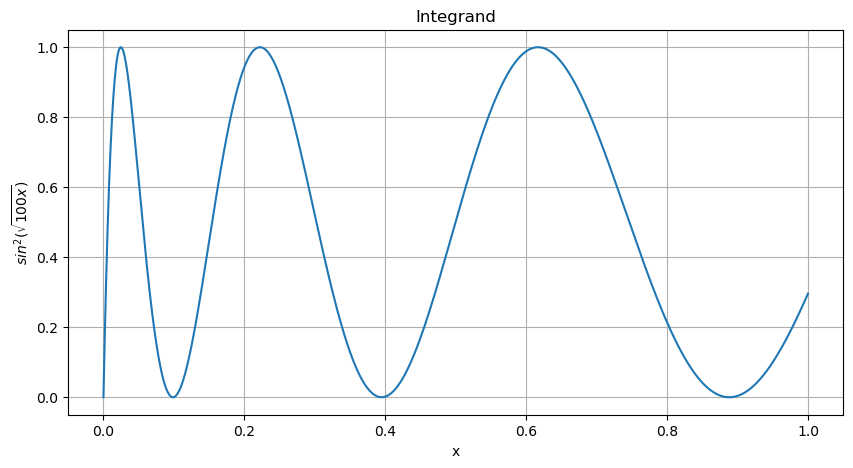


 Numerical Results 
Adaptive Trapezoid Converged:
  - Value: 0.45583206, Subintervals: 4096

Romberg Integration Converged:
  - Value: 0.45583253, Subintervals: 128

Gauss-Legendre Integration Converged:
  - Value: 0.45583253, Order: 10


In [4]:
# Problem 4 Code
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss

# Define the function to be integrated
def integrand_func(x):
    if isinstance(x, (int, float)) and x == 0:
        return 0.0
    return np.sin(np.sqrt(100 * x))**2



# (a)
print("Plot for (a) ")
# Create x-values for a smooth plot
x_plot_vals = np.linspace(0, 1, 1000)
y_plot_vals = np.vectorize(integrand_func)(x_plot_vals)
# Generate the plot
plt.figure(figsize=(10, 5))
plt.plot(x_plot_vals, y_plot_vals)
plt.xlabel("x")
plt.ylabel("$sin^2(\\sqrt{100x})$")
plt.title("Integrand")
plt.grid(True)
plt.show()
print("\n Numerical Results ")




# (b)
def adaptive_trapezoid(f, a, b, target_accuracy=1e-6):
    N = 1; i = 1; h = (b - a) / N
    # Start with a single interval
    I_prev = 0.5 * h * (f(a) + f(b))
    while True:
        i += 1; N *= 2; h_new = (b-a)/N;
        # Efficiently update the integral with new points
        I_curr = 0.5 * I_prev + h_new * sum(f(a + k * h_new) for k in range(1, N, 2))
        # Estimate the error and check for convergence
        if (1/3) * np.abs(I_curr - I_prev) < target_accuracy and i > 2:
            print(f"Adaptive Trapezoid Converged:\n  - Value: {I_curr:.8f}, Subintervals: {N}")
            return
        I_prev = I_curr
        if N > 2**20: break # Safety break to prevent infinite loops
adaptive_trapezoid(integrand_func, 0, 1)






# (c)
def romberg_integration(f, a, b, target_accuracy=1e-6, max_iter=20):
    R = np.zeros((max_iter, max_iter)); h = b - a;
    R[0, 0] = 0.5 * h * (f(a) + f(b)) # First trapezoid estimate
    for i in range(1, max_iter):
        h /= 2; N = 2**i
        # Get the next trapezoid estimate R(i,0)
        R[i, 0] = 0.5 * R[i-1, 0] + h * sum(f(a + k * h) for k in range(1, N, 2))
        # Use Richardson extrapolation to get more accurate estimates R(i,m)
        for m in range(i): R[i, m+1] = R[i, m] + (R[i, m] - R[i-1, m]) / (4**(m+1) - 1)
        # Check for convergence on the most accurate estimate (the diagonal)
        if np.abs(R[i, i] - R[i-1, i-1]) < target_accuracy and i > 1:
            print(f"\nRomberg Integration Converged:\n  - Value: {R[i, i]:.8f}, Subintervals: {N}")
            return
romberg_integration(integrand_func, 0, 1)






# (d)
def gauss_legendre_integration(target_accuracy=1e-6):
    I_prev = 0
    # Increase the number of points (N) until the answer converges
    for N in range(2, 50):
        # Get the weights and points for order N from the library
        points, weights = leggauss(N)
        # Perform the change of variables from [0,1] to [-1,1] and calculate the sum
        I_curr = np.sum(weights * np.vectorize(lambda t: 0.5 * integrand_func(0.5*(t+1)))(points))
        # Check if the integral value has stabilized
        if np.abs(I_curr - I_prev) < target_accuracy and N > 2:
            print(f"\nGauss-Legendre Integration Converged:\n  - Value: {I_curr:.8f}, Order: {N}")
            return
        I_prev = I_curr
gauss_legendre_integration()

## 5.

I solved (b) and (c) analytically to show the integrand's peak is at $x = a-1$, and the optimal constant for the change of variables ($z = \frac{x}{x+c}$) is $c = a-1$.

and (a) and (d) are handled by the code. The code plots the integrand, then uses the change of variables to map the infinite integral to a finite one. This transformed integral is then calculated using high-order Gaussian quadrature, and the results are verified against known values

---

### (b)

To find the value of $x$ where the integrand $\phi(x) = x^{a-1}e^{-x}$ is at its maximum, we take the derivative with respect to $x$ and set it to zero.

Using the product rule for differentiation:
$$ \frac{d\phi}{dx} = (a-1)x^{a-2}e^{-x} - x^{a-1}e^{-x} $$

Next, we factor out the common terms to simplify the expression:
$$ \frac{d\phi}{dx} = x^{a-2}e^{-x} (a-1-x) $$

Setting the derivative to zero, $x^{a-2}e^{-x} (a-1-x) = 0$, gives the non-trivial solution:
$$ a-1-x = 0 \implies x = a-1 $$

The integrand is at its maximum at **$x = a-1$**.

---
### (c)

The goal is to choose the constant $c$ in the transformation $z = \frac{x}{x+c}$ so that the peak of the integrand (which occurs at $x = a-1$) maps to the midpoint of the new integration domain, $z=1/2$.

We substitute $x = a-1$ and $z = 1/2$ into the transformation equation:
$$ \frac{1}{2} = \frac{(a-1)}{(a-1)+c} $$

Now, we solve this equation for $c$:
$$ (a-1)+c = 2(a-1) $$
$$ c = 2(a-1) - (a-1) $$
$$ c = a-1 $$

The optimal value for the constant is **$c = a-1$**. This result is used in the Python code for part (d) to perform the change of variables for the integral.

/tmp/xpython_42/2965286124.py:4: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.special import gamma as scipy_gamma


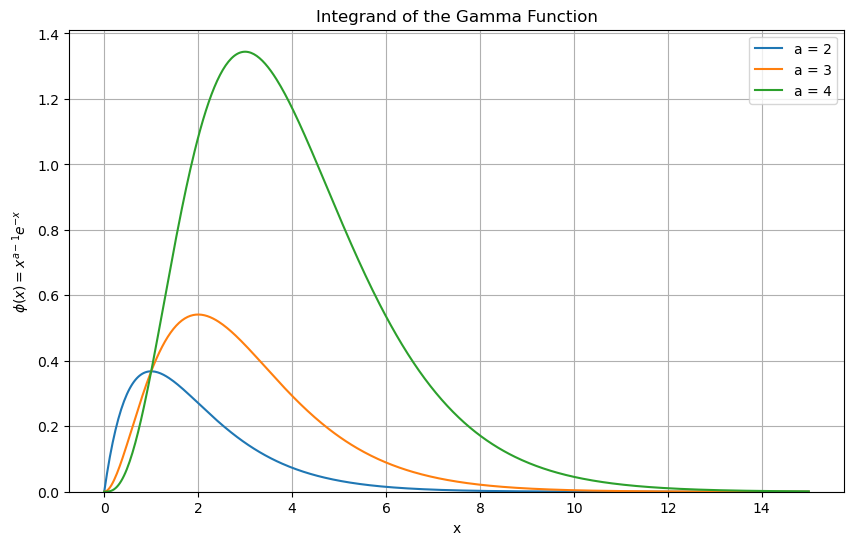


Calculating for a = 2:
  - Numerical Result: 1.00000000
  - True Value:       1.00000000
  - Relative Error:   5.86e-12

Calculating for a = 3:
  - Numerical Result: 2.00000000
  - True Value:       2.00000000
  - Relative Error:   2.93e-14

Calculating for a = 4:
  - Numerical Result: 6.00000000
  - True Value:       6.00000000
  - Relative Error:   6.07e-15

Calculating for a = 3.5:
  - Numerical Result: 3.32335097
  - True Value:       3.32335097
  - Relative Error:   1.43e-12


In [5]:
# Problem 5 Code
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma as scipy_gamma

# Define the integrand of the Gamma function
def phi(x, a):
    if isinstance(x, (int, float)) and x == 0: return 0.0
    return x**(a-1) * np.exp(-x)

# (a)
x_plot_gamma = np.linspace(0, 15, 500)
plt.figure(figsize=(10, 6))
for a_val in [2, 3, 4]:
    plt.plot(x_plot_gamma, np.vectorize(phi)(x_plot_gamma, a_val), label=f'a = {a_val}')
plt.xlabel("x"); plt.ylabel("$\\phi(x) = x^{a-1}e^{-x}$"); plt.title("Integrand of the Gamma Function")
plt.legend(); plt.grid(True); plt.ylim(bottom=0); plt.show()





# (d)
def calculate_gamma(a, N=50):
    # This is the transformed integrand after the change of variables z = x/(x+c)
    # where c has been set to a-1
    def gamma_integrand_z(z, a_val):
        if z == 1.0 or z == 0.0: return 0.0
        # Inverse transform: find x from z
        x = z * (a_val - 1) / (1 - z)
        # Calculate the original integrand phi(x) and multiply by the Jacobian dx/dz
        # This is done in log-space to avoid numerical overflow
        return np.exp((a_val - 1) * np.log(x) - x) * (a_val - 1) / (1 - z)**2
    
    # Use Gaussian quadrature to solve the transformed integral from z=0 to z=1
    points, weights = leggauss(N)
    # Re-scale the points and weights from [-1,1] to [0,1]
    z_points = 0.5 * (points + 1); z_weights = 0.5 * weights
    # Calculate the integral by summing the weighted function values
    return np.sum(z_weights * np.vectorize(gamma_integrand_z)(z_points, a))

# Loop through several values of 'a' to test the function
for a_val in [2, 3, 4, 3.5]:
    # Calculate our numerical result
    gamma_calc = calculate_gamma(a_val, N=50)
    # Get the "true" value from SciPy's gamma function
    true_val = scipy_gamma(a_val)
    # Print the comparison
    print(f"\nCalculating for a = {a_val}:\n  - Numerical Result: {gamma_calc:.8f}\n  - True Value:       {true_val:.8f}\n  - Relative Error:   {np.abs(gamma_calc - true_val) / true_val:.2e}")